In [3]:
# Import pandas, Numpy
import pandas as pd
import numpy as np

In [4]:
# Reading dataset using pandas
df = pd.read_excel('C:/Users/rikky/Downloads/ipynb/ca_housing.xlsx', sep=';')

In [5]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [6]:
# Check any null values
df.isnull().values.any()

True

In [7]:
# List of Column names and number of NaNs if any 
[print(x, df[x].isna().sum()) for x in df.columns[df.isna().any()].tolist()]

total_bedrooms 207


[None]

In [10]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [11]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
new_df = df.copy()

In [13]:
# Converting categorical values to numerical values using integer mapping
map_ocean_proximity_to_num= {'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2 ,'NEAR BAY':3, 'ISLAND':4}
new_df['ocean_proximity']=new_df['ocean_proximity'].map(map_ocean_proximity_to_num)
new_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
0             322         126         8.3252              452600   
1            2401        1138         8.3014              358500   
2             496         177         7.2574              352100   
3             558         219         5.6431              341300   
4             565         259         3.8462              342200   
...           ...         ...            ...                 ...   
20635         845         330         1.5603               78100   
20636         356         114         2.5568               77100   
20637        1007         433         1.7000               92300   
20638         741         349         1.8672               84700   
20639        1387         530         2.3886               89400   

       ocean_proximity  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  
...                ...  
20635                1  
20636                1  
20637                1  
20638                1  
20639                1  

[20640 rows x 10 columns]

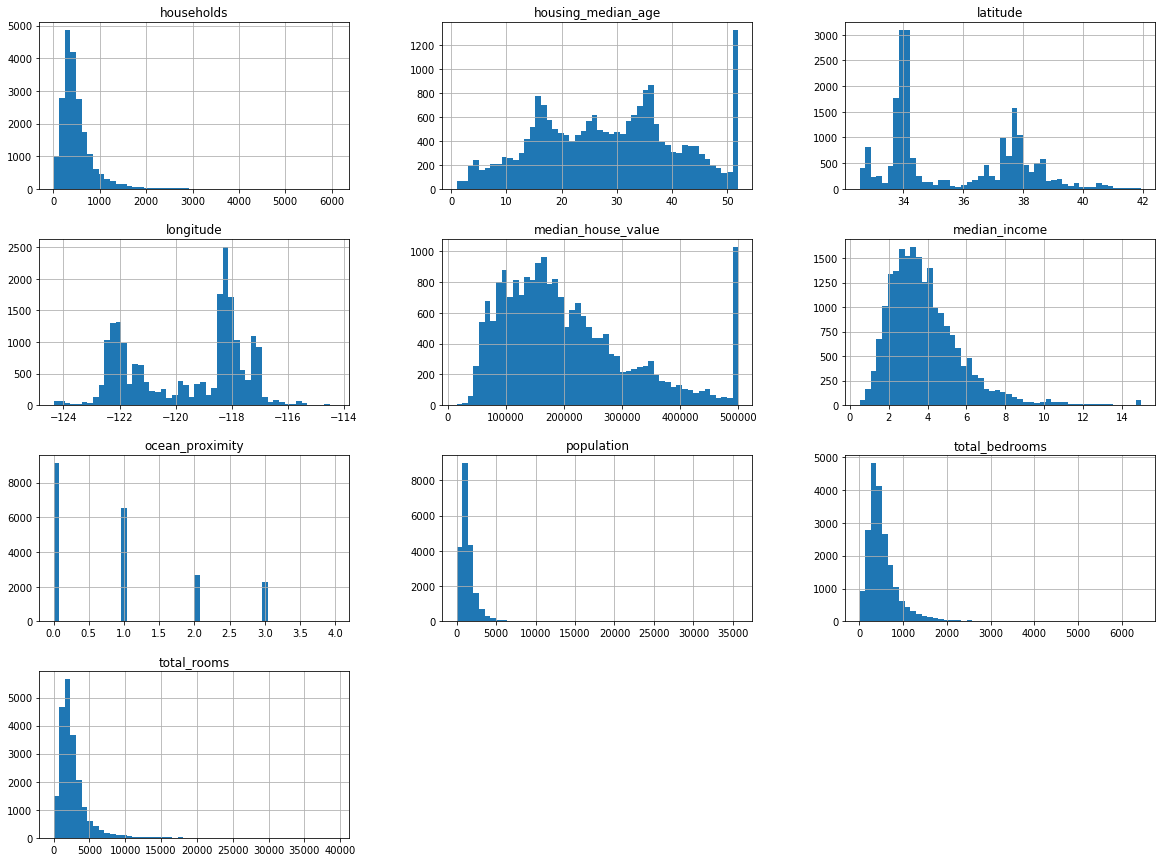

In [14]:
#Ploting histogram to the dataset
import matplotlib.pyplot as plt
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Impute missing values using IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(new_df)
imputed_df = imp.transform(new_df)
imputed_df = pd.DataFrame(imputed_df, columns=new_df.columns)
imputed_df.head(20)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value  ocean_proximity  
0        322.0       126.0         8.3252            452600.0              3.0  
1       2401.0      1138.0         8.3014            358500.0              3.0  
2        496.0       177.0         7.2574            352100.0              3.0  
3        558.0       219.0         5.6431            341300.0              3.0  
4        565.0       259.0         3.8462            342200.0              3.0  
5        413.0       193.0         4.0368            269700.0              3.0  
6       1094.0       514.0         3.6591            299200.0              3.0  
7       1157.0       647.0         3.1200            241400.0              3.0  
8       1206.0       595.0         2.0804            226700.0              3.0  
9       1551.0       714.0         3.6912            261100.0              3.0  
10       910.0       402.0         3.2031            281500.0              3.0  
11      1504.0       734.0         3.2705            241800.0              3.0  
12      1098.0       468.0         3.0750            213500.0              3.0  
13       345.0       174.0         2.6736            191300.0              3.0  
14      1212.0       620.0         1.9167            159200.0              3.0  
15       697.0       264.0         2.1250            140000.0              3.0  
16       793.0       331.0         2.7750            152500.0              3.0  
17       648.0       303.0         2.1202            155500.0              3.0  
18       990.0       419.0         1.9911            158700.0              3.0  
19       690.0       275.0         2.6033            162900.0              3.0

In [19]:
# Scaling data and splitting data to Train, Test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#creating x and y variables for models from imputed_df and scaling data
features = list(imputed_df.columns)
features
target = features.pop()
target

x = imputed_df.loc[:, features].values
y = imputed_df.loc[:, target].values

scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2,random_state=42)

# Using negative evaluation metrics for regression as only this is available 
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

# Using negative scores as cross_validation function negates the scores which are meant to be minimized.
# Scores that are meant to be maximized such as R2 are left positive.
scoring = ['neg_mean_squared_error', 'r2']

In [25]:
# Creating, Performing and Evaluating Models like LinearRegression, Gradient Boosting, Random Forest Regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_validate

linearRegressor = LinearRegression()
linear_scores = cross_validate(linearRegressor, x_scaled, y, cv=10, 
 scoring=scoring)

gradientBR=GradientBoostingRegressor(n_estimators=100) 
gradient_scores = cross_validate(gradientBR, x_scaled, y, cv=10, 
 scoring=scoring)

rfReg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_scores = cross_validate(rfReg, x_scaled, y, cv=10, 
 scoring=scoring)

print("10Fold Cross Validation Results Linear Regression:")
print("MSE : ",np.mean(-linear_scores['test_neg_mean_squared_error']))
print("R2 Square : ",np.mean(linear_scores['test_r2']))
print()
print("10Fold Cross Validation Results Gradient Boosting Regression:")
print("MSE : ",np.mean(-gradient_scores['test_neg_mean_squared_error']))
print("R2 Square : ",np.mean(gradient_scores['test_r2']))
print()
print("10Fold Cross Validation Results Random Forest Regression:")
print("MSE : ",np.mean(-rf_scores['test_neg_mean_squared_error']))
print("R2 Square : ",np.mean(rf_scores['test_r2']))

10Fold Cross Validation Results Linear Regression:
MSE :  0.9597383691010893
R2 Square :  -1.0299185910733637

10Fold Cross Validation Results Gradient Boosting Regression:
MSE :  0.4872867009168038
R2 Square :  0.12485301365847937

10Fold Cross Validation Results Random Forest Regression:
MSE :  0.44273320251937986
R2 Square :  0.1717112804336412


                                                    # Model Comparison

|  Model  | Mean Squared Error | R squared |
| :-: | :-: | :-: |
| Random Forest Regression | 0.442 | 0.171 |
| Gradient Boosting Regression | 0.487 | 0.124 |
| Linear Regression | 0.959 | -1.029 |

In [ ]:
# From the above model comparison we can conclude Random Forest Regressor works better.
# As it has High R squared value and Low mean squared error.